# week2 练习
 *2024-04-15 至 2024-04-21*

## numpy

In [1]:
import time
import copy, math
import numpy as np    
import matplotlib.pyplot as plt

In [2]:
my_array = np.array([1, 2, 3, 4, 5])
print(type(my_array))

<class 'numpy.ndarray'>


In [3]:
my_array2 = my_array + 1
print (f"my_array2 is: {my_array2 }")

my_array2 is: [2 3 4 5 6]


In [4]:
a = np.zeros(4);        print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.zeros((4,));             print(f"np.zeros(4,) :  a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) :   a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.zeros(4,) :  a = [0. 0. 0. 0.], a shape = (4,), a data type = float64


In [5]:
#用向量组构造矩阵 && 对矩阵的操作
#索引
a = np.zeros((1, 5))                                       
print(f"a shape = {a.shape}, a = {a}")                     
a = np.random.random_sample((1, 1))  
print(f"a shape = {a.shape}, a = {a}") 
#reshape
a = np.arange(6).reshape(-1, 2)  
print(f"a.shape: {a.shape}")
print(f"a = ")
print(a)
#访问元素
print(f"a[2,0].shape: {a[2, 0].shape} , a[2,0] = {a[2, 0]},  type(a[2,0]) = {type(a[2, 0])} ")
#访问行
print(f"a[2].shape: {a[2].shape}, a[2] = {a[2]}, type(a[2]) = {type(a[2])}")

a shape = (1, 5), a = [[0. 0. 0. 0. 0.]]
a shape = (1, 1), a = [[0.75771258]]
a.shape: (3, 2)
a = 
[[0 1]
 [2 3]
 [4 5]]
a[2,0].shape: () , a[2,0] = 4,  type(a[2,0]) = <class 'numpy.int32'> 
a[2].shape: (2,), a[2] = [4 5], type(a[2]) = <class 'numpy.ndarray'>


In [6]:
a = np.random.random_sample(4)
print(f"np.random.random_sample(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.random.random_sample(4): a = [0.08644653 0.32389269 0.25528395 0.57991979], a shape = (4,), a data type = float64


In [7]:
a = np.arange(4. );              
print(f"np.arange(4.): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.rand(4);          
print(f"np.random.rand(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5,4,3,2])
print(f"np.array([5,4,3,2]):  a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5.,4,3,2] )
print(f"np.array([5.,4,3,2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.arange(4.): a = [0. 1. 2. 3.], a shape = (4,), a data type = float64
np.random.rand(4): a = [0.13276235 0.57428021 0.2283736  0.44324936], a shape = (4,), a data type = float64
np.array([5,4,3,2]):  a = [5 4 3 2], a shape = (4,), a data type = int32
np.array([5.,4,3,2]): a = [5. 4. 3. 2.], a shape = (4,), a data type = float64


In [8]:
print(f"a        = {a}")
#(start:stop:step)
c = a[2:7:1]
print("a[2:7:1] = ", c)
# access 3 elements separated by two 
c = a[2:7:2]    
print("a[2:7:2] = ", c)
# index=3之后所有（左闭右开含3）
c = a[3:]     
print("a[3:]    = ", c)
# index=3之前所有（右开不含3）
c = a[:3]        
print("a[:3]    = ", c)
# 所有
c = a[:]        
print("a[:]     = ", c)

a        = [5. 4. 3. 2.]
a[2:7:1] =  [3. 2.]
a[2:7:2] =  [3.]
a[3:]    =  [2.]
a[:3]    =  [5. 4. 3.]
a[:]     =  [5. 4. 3. 2.]


## 多元线性回归

*加载数据集*

In [9]:
def load_house_data(txt_file):
    with open(txt_file, 'r') as file:
        data = [line.strip().split(',') for line in file.readlines()]
        print("Loaded data:")
        for row in data:
            print(row)
    return data
Loaded_data = np.array(load_house_data ("D:/2345Downloads/houses.txt"), dtype=float)
X_features = ['size(sqft)','bedrooms','floors','age']

Loaded data:
['9.520000000000000000e+02', '2.000000000000000000e+00', '1.000000000000000000e+00', '6.500000000000000000e+01', '2.715000000000000000e+02']
['1.244000000000000000e+03', '3.000000000000000000e+00', '1.000000000000000000e+00', '6.400000000000000000e+01', '3.000000000000000000e+02']
['1.947000000000000000e+03', '3.000000000000000000e+00', '2.000000000000000000e+00', '1.700000000000000000e+01', '5.098000000000000114e+02']
['1.725000000000000000e+03', '3.000000000000000000e+00', '2.000000000000000000e+00', '4.200000000000000000e+01', '3.940000000000000000e+02']
['1.959000000000000000e+03', '3.000000000000000000e+00', '2.000000000000000000e+00', '1.500000000000000000e+01', '5.400000000000000000e+02']
['1.314000000000000000e+03', '2.000000000000000000e+00', '1.000000000000000000e+00', '1.400000000000000000e+01', '4.150000000000000000e+02']
['8.640000000000000000e+02', '2.000000000000000000e+00', '1.000000000000000000e+00', '6.600000000000000000e+01', '2.300000000000000000e+02']


In [10]:
X_train = Loaded_data[:, :-1]  # 前四列是 X_train
y_train = Loaded_data[:, -1]   # 最后一列是 y_train
X_features = ['size(sqft)','bedrooms','floors','age']
b_init = 785.0
w_init = np.array([ 0.39, 18.75, -54.25, -26.68])

*预测*

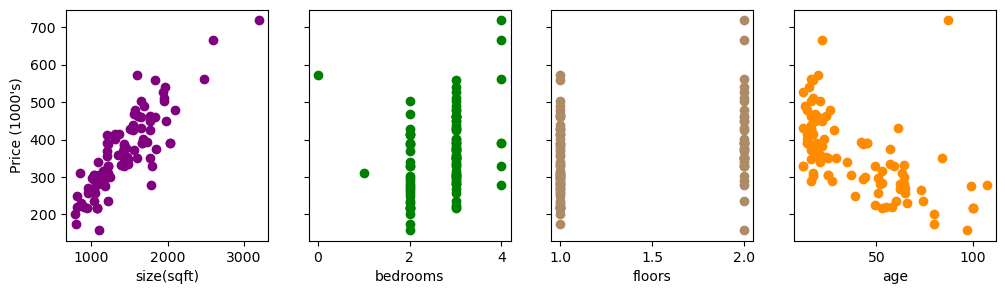

In [11]:
from matplotlib import colors
X_train_array = np.array(X_train, dtype=float)
y_train_array = np.array(y_train, dtype=float)
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
colors = ['purple', 'green', colors.rgb2hex((0.678, 0.547, 0.402)) , colors.rgb2hex((1.0, 0.549, 0.0)) ]
# 遍历每个特征
for i in range(len(ax)):
    # 绘制散点图
    ax[i].scatter(X_train[:,i], y_train, color = colors[i])
    # 设置 x 轴标签
    ax[i].set_xlabel(X_features[i])
# 设置 y 轴标签
ax[0].set_ylabel("Price (1000's)")
# 显示图形
plt.show()

In [12]:
def predict_single_loop(x, w, b): 
    n = x.shape[0]; p=0 #p记录预测值
    for i in range(n):
        p += x[i]* w[i]
    p += b #别忘记加上b
    return p 

In [13]:
# get a row from our training data
x_vec = X_train[0,:]
f_wb = predict_single_loop(x_vec, w_init, b_init)
print (f" x_vec =  {x_vec}")
print (f" x_vec shape  =  {x_vec.shape}")
print (f" f_wb_pre     =  {f_wb}")
print (f" f_wb  shape  =  {f_wb.shape}")

 x_vec =  [952.   2.   1.  65.]
 x_vec shape  =  (4,)
 f_wb_pre     =  -594.6700000000001
 f_wb  shape  =  ()


In [14]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [15]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 228813.2906322401


In [16]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [17]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: \n {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 
 -81.12711999999996
dj_dw at initial w,b: 
 [-12252.71664   -153.73498    -25.07362 -20331.69688]


In [18]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)   
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db              
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history 

In [19]:
initial_w = np.zeros_like(w_init)
initial_b = 0.0
iterations = 600
alpha = 5.0e-9
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 69525.30   
Iteration   60: Cost 19924.61   
Iteration  120: Cost  6527.04   
Iteration  180: Cost  2908.18   
Iteration  240: Cost  1930.60   
Iteration  300: Cost  1666.46   
Iteration  360: Cost  1595.02   
Iteration  420: Cost  1575.63   
Iteration  480: Cost  1570.30   
Iteration  540: Cost  1568.77   
b,w found by gradient descent: 0.00,[2.52636285e-01 4.44533540e-04 2.16662367e-04 4.07736109e-03] 
prediction: 240.78, target value: 271.5
prediction: 314.54, target value: 300.0
prediction: 491.95, target value: 509.8
prediction: 435.97, target value: 394.0
prediction: 494.98, target value: 540.0
prediction: 332.02, target value: 415.0
prediction: 218.55, target value: 230.0
prediction: 463.91, target value: 560.0
prediction: 259.38, target value: 294.0
prediction: 807.28, target value: 718.2
prediction: 199.40, target value: 200.0
prediction: 303.23, target value: 302.0
prediction: 393.43, target value: 468.0
prediction: 361.35, target value: 374.2
prediction:

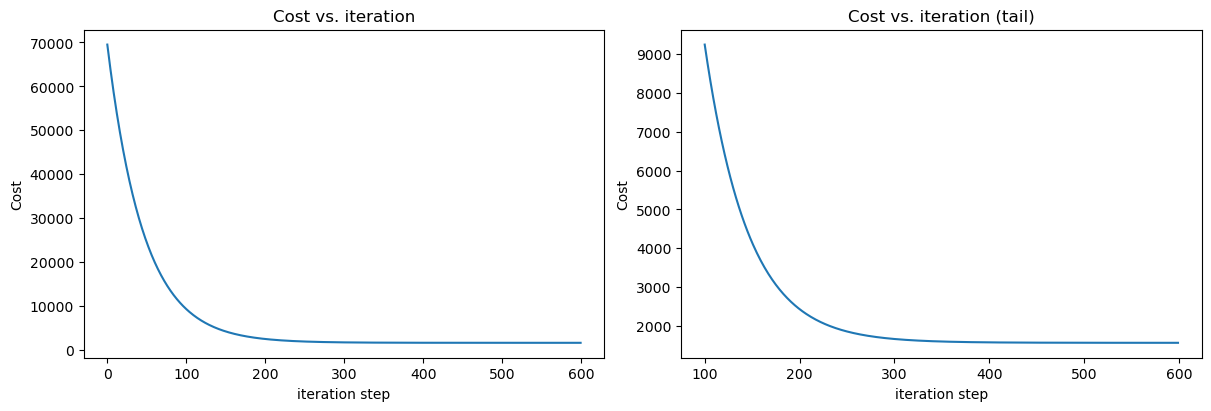

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

*分类*

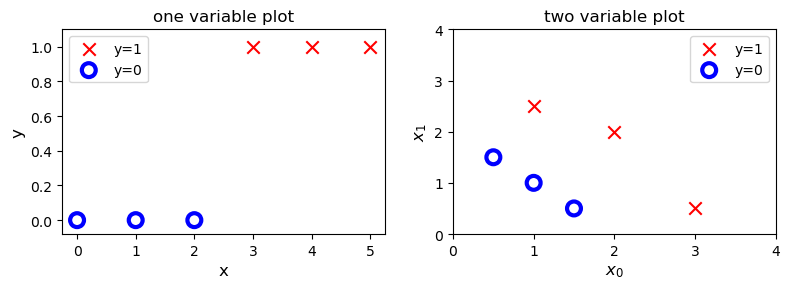

In [21]:
# 导入所需的库
# 定义单一特征的训练数据和目标标签
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
# 定义两个特征的训练数据和目标标签
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

pos = y_train == 1
neg = y_train == 0

# 创建一个包含两个子图的画布
fig, ax = plt.subplots(1,2,figsize=(8,3))
def plot_data(X, y, ax):
    # 筛选目标变量为 1 和 0 的数据点索引
    pos = y == 1
    neg = y == 0
    
    # 绘制目标变量为 1 和 0 的数据点
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c='red', label="y=1") # 绘制目标变量为 1 的数据点
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=100, label="y=0", facecolors='none', 
               edgecolors='blue', lw=3) # 绘制目标变量为 0 的数据点


# 绘制第一个子图，单一特征的散点图
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1") # 绘制目标变量为 1 的数据点
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors='blue' ,lw=3) # 绘制目标变量为 0 的数据点
ax[0].set_ylim(-0.08,1.1) # 设置 y 轴范围
ax[0].set_ylabel('y', fontsize=12) # 设置 y 轴标签
ax[0].set_xlabel('x', fontsize=12) # 设置 x 轴标签
ax[0].set_title('one variable plot') # 设置子图标题
ax[0].legend() # 显示图例

# 绘制第二个子图，两个特征的散点图
plot_data(X_train2, y_train2, ax[1]) # 调用自定义函数 plot_data 绘制散点图
ax[1].axis([0, 4, 0, 4]) # 设置坐标轴范围
ax[1].set_ylabel('$x_1$', fontsize=12) # 设置 y 轴标签
ax[1].set_xlabel('$x_0$', fontsize=12) # 设置 x 轴标签
ax[1].set_title('two variable plot') # 设置子图标题
ax[1].legend() # 显示图例

# 调整子图布局
plt.tight_layout()
# 显示图形
plt.show()

*sigmoid函数*

In [30]:
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)
print("Input to exp:", input_array)
print("Output of exp:", exp_array)
# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)
print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.71828183  7.3890561  20.08553692]
Input to exp: 1
Output of exp: 2.718281828459045


In [31]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))  
    return g

In [33]:
z_tmp = np.arange(-100,101)
# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)
# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+02  3.720e-44]
 [-9.900e+01  1.011e-43]
 [-9.800e+01  2.749e-43]
 [-9.700e+01  7.472e-43]
 [-9.600e+01  2.031e-42]
 [-9.500e+01  5.521e-42]
 [-9.400e+01  1.501e-41]
 [-9.300e+01  4.080e-41]
 [-9.200e+01  1.109e-40]
 [-9.100e+01  3.014e-40]
 [-9.000e+01  8.194e-40]
 [-8.900e+01  2.227e-39]
 [-8.800e+01  6.055e-39]
 [-8.700e+01  1.646e-38]
 [-8.600e+01  4.474e-38]
 [-8.500e+01  1.216e-37]
 [-8.400e+01  3.306e-37]
 [-8.300e+01  8.986e-37]
 [-8.200e+01  2.443e-36]
 [-8.100e+01  6.640e-36]
 [-8.000e+01  1.805e-35]
 [-7.900e+01  4.906e-35]
 [-7.800e+01  1.334e-34]
 [-7.700e+01  3.625e-34]
 [-7.600e+01  9.854e-34]
 [-7.500e+01  2.679e-33]
 [-7.400e+01  7.281e-33]
 [-7.300e+01  1.979e-32]
 [-7.200e+01  5.380e-32]
 [-7.100e+01  1.462e-31]
 [-7.000e+01  3.975e-31]
 [-6.900e+01  1.081e-30]
 [-6.800e+01  2.937e-30]
 [-6.700e+01  7.985e-30]
 [-6.600e+01  2.171e-29]
 [-6.500e+01  5.900e-29]
 [-6.400e+01  1.604e-28]
 [-6.300e+01  4.360e-28]
 [-6.200e+01  1.185